In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

from nltk.tokenize import sent_tokenize, word_tokenize, regexp_tokenize
from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer

First I want to inspect the metadata files and make the information more useful. For example, the author column in the Project Gutenberg data.

In [2]:
pg_metadata = pd.read_csv('../data/gut_books/austen_metadata.csv')

In [3]:
pg_metadata.head()

,Text#,Type,Issued,Title,Language,Authors,Subjects,LoCC,Bookshelves
0,105,Text,1994-02-01,Persuasion,en,"Austen, Jane, 1775-1817",England -- Social life and customs -- 19th cen...,PR,NaN
1,121,Text,1994-04-01,Northanger Abbey,en,"Austen, Jane, 1775-1817",England -- Social life and customs -- 19th cen...,PR,Gothic Fiction
2,141,Text,1994-06-01,Mansfield Park,en,"Austen, Jane, 1775-1817",England -- Fiction; Young women -- Fiction; Lo...,PR,NaN
3,158,Text,1994-08-01,Emma,en,"Austen, Jane, 1775-1817",Humorous stories; England -- Fiction; Young wo...,PR,NaN
4,21839,Text,2007-06-15,Sense and Sensibility,en,"Austen, Jane, 1775-1817; Dobson, Austin, 1840-...",England -- Social life and customs -- 19th cen...,PR,NaN


Keep columns: Text#, Title, Authors

In [4]:
pg_metadata = pg_metadata[['Text#', 'Title', 'Authors']]

In [5]:
# clean up Authors
pg_metadata['Authors'] = pg_metadata['Authors'].str.split(',').str[:2].str.join(',')

In [ ]:
pg_metadata

In [6]:
ao3_metadata = pd.read_csv('../data/fanfic_texts/links_05182024053844.csv')

In [7]:
ao3_metadata.head()

,title,author,summary,fandoms,warnings,characters,relationships,tags,words,rating,chapters,categories,complete,link
0,We Have Been Trying To Reach You About Your Li...,Katri,\n<p>Just a bit of silliness based on the prom...,"['Pride and Prejudice - Jane Austen', 'Pride a...",['No Archive Warnings Apply'],['Mr. Bennet (Pride and Prejudice)'],[],[],"11,116",General Audiences,2/2,F/M,True,https://archiveofourown.org/works/55697983
1,The Younger Son,Sonetka,"\n<p>For the JAFF Trope Inversion Prompt: ""The...","['AUSTEN Jane - Works', 'Sense and Sensibility...",['Creator Chose Not To Use Archive Warnings'],"['Edward Ferrars', 'Elinor Dashwood', 'Fanny D...",['Elinor Dashwood/Edward Ferrars'],[],"7,164",General Audiences,1/1,"F/M, Gen",True,https://archiveofourown.org/works/55785940
2,Golden,Courtney621,\n<p>Mrs. Bennet’s foolish boast about her eld...,"['Pride and Prejudice - Jane Austen', 'AUSTEN ...",['No Archive Warnings Apply'],"['Jane Bennet', 'Charles Bingley', 'Caroline B...",['Jane Bennet/Charles Bingley'],"['Alternate Universe - Fairy Tale', 'Alternate...","12,066",General Audiences,3/3,F/M,True,https://archiveofourown.org/works/55435072
3,Pride and Prejudice,wildwomendontgettheblues,"\n<p>""It is a truth universally acknowledged, ...",['Pride and Prejudice - Jane Austen'],['No Archive Warnings Apply'],"['Fitzwilliam Darcy', 'Elizabeth Bennet', 'Wil...","['Elizabeth Bennet/Fitzwilliam Darcy', 'Jane B...","['Enemies to Lovers', 'Falling In Love', 'Comi...","122,143",Not Rated,2/2,"F/M, Gen",True,https://archiveofourown.org/works/55736635
4,The Settlement of Lady Elliot's Piano,Gwynterys,\n<p>—Admiral Croft executes an outflanking ma...,['Persuasion - Jane Austen'],['No Archive Warnings Apply'],"['Anne Elliot', 'Frederick Wentworth', 'Admira...",['Anne Elliot & Frederick Wentworth'],"['Marriage', 'Family Drama', 'Character Study'...","5,941",General Audiences,2/2,"F/M, Gen",True,https://archiveofourown.org/works/55189105


In [8]:
# create Text# column by extracting the work_id from link column
ao3_metadata['Text#'] = ao3_metadata['link'].str.split(pat = '/').str[-1]

In [ ]:
ao3_metadata.head()

Keep columns: Text#, title, author, words

In [10]:
ao3_metadata = ao3_metadata[['Text#', 'title', 'author', 'words']]

In [17]:
# drop 55736635 - it's actually the text of Pride and Prejudice which someone posted to AO3 for some reason
ao3_metadata = ao3_metadata.loc[ao3_metadata['Text#'] != '55736635']

In [18]:
ao3_metadata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 348 entries, 0 to 348
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text#   348 non-null    object
 1   title   348 non-null    object
 2   author  348 non-null    object
 3   words   348 non-null    object
dtypes: object(4)
memory usage: 13.6+ KB


The number of words in the AO3 works is given in the metadata, but I'll need to create that information for the PG books. However, since that might change after data exploration and further cleaning, I'll write the code to generate the information here but use it later.

In [21]:
word_num = 0

for id in pg_metadata['Text#']:
    with open(f'../data/texts/{id}.txt', 'r') as file:
        print(id)
        data = file.read()
        lines = data.split()
        word_num = len(lines)

    print(word_num)

105
83335
121
77223
141
159630
158
157558
21839
121870
42671
121980


Initially the word count for the Austen books was quite low due to the newline characters essentially joining words. I went back to the scraping notebook and amended the code to remove those characters which fixed the problem.

In [22]:
# inspecting a text from AO3 to make sure all is as it should be
with open('../data/texts/55785940.txt', 'r') as file:
    data = file.read()

data

'He could not write to Miss Dashwood. That was the sole thought he could cling to after reading and rereading Lucy’s letter, simultaneously shocked and overjoyed by her rejection. He was no longer bound to her, and had he received this letter before his mother cast him off, he would already have been writing to Miss Dashwood to apologize once more, explain, plead, propose at last. But now that he was dismissed both by Lucy and his mother, he felt that he had been cast adrift. He had no right to propose to Miss Dashwood when he had nothing to offer her but his hundred pounds a year and a possibility that he might one day find a living. He knew all too well how sparse were good livings, how long he might have to wait, and could not bear the prospect of once again entering into an engagement of indeterminate length, one which might drag on for years as his last one had, exhausting and possibly embittering them both. To be sure, Miss Dashwood was an altogether superior person to Lucy — he 

Decided to start writing helper functions, and the first is one to read in the text files. The file path is quite customized for how this repo is structured but I'm ok with that. Inputs are the foldername (which will be either gut_books or fanfic_texts in this case) and work_id which is always an integer for the two sources I have. However I've specified the work_id input be a string to make it a bit more resilient.

Import as h, I made the name too long.

In [23]:
# testing function
import helper_functions as h

test_book = h.read_text('105')

In [24]:
test_book

'Persuasion by Jane Austen (1818) Contents CHAPTER I. CHAPTER II. CHAPTER III. CHAPTER IV. CHAPTER V. CHAPTER VI. CHAPTER VII. CHAPTER VIII. CHAPTER IX. CHAPTER X. CHAPTER XI. CHAPTER XII. CHAPTER XIII. CHAPTER XIV. CHAPTER XV. CHAPTER XVI. CHAPTER XVII. CHAPTER XVIII. CHAPTER XIX. CHAPTER XX. CHAPTER XXI. CHAPTER XXII. CHAPTER XXIII. CHAPTER XXIV. CHAPTER I. Sir Walter Elliot, of Kellynch Hall, in Somersetshire, was a man who, for his own amusement, never took up any book but the Baronetage; there he found occupation for an idle hour, and consolation in a distressed one; there his faculties were roused into admiration and respect, by contemplating the limited remnant of the earliest patents; there any unwelcome sensations, arising from domestic affairs changed naturally into pity and contempt as he turned over the almost endless creations of the last century; and there, if every other leaf were powerless, he could read his own history with an interest which never failed. This was the 

In [25]:
# rename columns
ao3_metadata.rename(columns = {'Text#': 'text#'}, inplace = True)
pg_metadata.rename(columns = {'Text#': 'text#', 'Title': 'title', 'Authors': 'author'}, inplace = True)

# make a single metadata file in preparation for analyzing text, ensure no Text# is duplicated
metadata = pd.concat([ao3_metadata, pg_metadata], axis = 0)

/var/folders/xm/vmtk5pms0jzb2kmtm00lwtn80000gn/T/ipykernel_10611/4067712958.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ao3_metadata.rename(columns = {'Text#': 'text#'}, inplace = True)


In [26]:
metadata['text#'].value_counts()
# all text# values are unique

text#
55697983    1
8483071     1
21405847    1
21976180    1
21285821    1
           ..
36360334    1
28979799    1
33992647    1
4540179     1
42671       1
Name: count, Length: 354, dtype: int64

Find most common words in the texts. Lowercase, lemmatize, remove stopwords, and create a counter object column to add to the metadata.

Look at the distribution - how do the fanfic writers compare to Austen, and how do the Austen novels compare to each other?

I think also I'll need to go back and remove the word CHAPTER from the novel texts - it's not really part of the text and could skew things slightly.

Another note: think about what to do with named entities.

In [27]:
stop_words = set(stopwords.words('english'))

# use test_book to work the code out for the function
wnl = WordNetLemmatizer()

text_counter = Counter([wnl.lemmatize(x.lower()) for x in regexp_tokenize(test_book, '[-\'\w]+') if x.lower() not in stop_words])

In [38]:
text_counter

Counter({'mr': 1113,
         'elizabeth': 585,
         'could': 522,
         'would': 465,
         'said': 398,
         'darcy': 372,
         'much': 325,
         'must': 305,
         'bennet': 305,
         'one': 289,
         'every': 283,
         'miss': 281,
         'jane': 260,
         'bingley': 255,
         'lady': 253,
         'sister': 250,
         'know': 244,
         'though': 222,
         'time': 221,
         'never': 219,
         'soon': 217,
         'well': 216,
         'think': 215,
         'might': 200,
         'may': 192,
         'good': 191,
         'thing': 191,
         'little': 187,
         'nothing': 177,
         'say': 174,
         'make': 172,
         'without': 169,
         'wickham': 162,
         'day': 161,
         'shall': 161,
         'collins': 161,
         'family': 158,
         'dear': 158,
         'friend': 156,
         'see': 155,
         'first': 146,
         'hope': 144,
         'man': 142,
         'great': 1

In [28]:
len(text_counter)
# gives number of unique words in the text, could be an interesting piece of information when normalized against the length of the text?

5312

In [29]:
pd.Series(text_counter.values()).describe()

count    5312.000000
mean        7.198983
std        21.701136
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       545.000000
dtype: float64

In [30]:
# create counter object with text (from read_text function)

def get_counter(text):
    '''Create counter object from text.'''
    stop_words = set(stopwords.words('english'))
    wnl = WordNetLemmatizer()
    text_counter = Counter([wnl.lemmatize(x.lower()) for x in regexp_tokenize(text, '[-\'\w]+') if x.lower() not in stop_words])

    return text_counter

In [31]:
test_counter = get_counter(test_book)

In [32]:
len(test_counter)

5312

In [33]:
import helper_functions as h

test_book = h.read_text('105')
counter_test = h.get_counter(test_book)
len(counter_test)

5312

In [34]:
metadata.to_csv('../data/metadata.csv', index = False)

In [35]:
metadata = pd.read_csv('../data/metadata.csv')

In [36]:
# there's something going wrong here, never finishes with all the files
# ended up there was a file issue, the code should do fine now
counters = []
counter_len = []

for id in metadata['text#']:
    text = h.read_text(id)
    text_counter = h.get_counter(text)
    counters.append(text_counter)
    counter_len.append(len(text_counter))

metadata['word_counter'] = counters
metadata['unique_words'] = counter_len

In [37]:
metadata.head()

,text#,title,author,words,word_counter,unique_words
0,55697983,We Have Been Trying To Reach You About Your Li...,Katri,"11,116","{'trying': 8, 'reach': 2, 'life': 24, 'expecta...",1569
1,55785940,The Younger Son,Sonetka,"7,164","{'could': 46, 'write': 10, 'miss': 35, 'dashwo...",1345
2,55435072,Golden,Courtney621,"12,066","{'netherfield': 82, 'park': 14, 'let': 20, 'la...",1882
3,55189105,The Settlement of Lady Elliot's Piano,Gwynterys,"5,941","{'frustration': 3, 'reigned': 1, 'unchallenged...",1592
4,53512534,A Different Bennet Family,Fanfictionfan_01_1981,"34,346","{'bennet': 426, 'family': 204, 'history': 4, '...",2778


Is there value is adding ['mr', 'mrs', 'miss'] to the stopword list? Do some exploring to look at word frequency.

In [41]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text#         354 non-null    int64 
 1   title         354 non-null    object
 2   author        354 non-null    object
 3   words         348 non-null    object
 4   word_counter  354 non-null    object
 5   unique_words  354 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 16.7+ KB


Counter({'mr': 545, 'anne': 497, 'could': 451, 'would': 354, 'captain': 304, 'elliot': 289, 'lady': 242, 'one': 239, 'must': 227, 'wentworth': 218, 'much': 205, 'little': 176, 'said': 173, 'good': 170, 'time': 167, 'charles': 166, 'might': 165, 'think': 155, 'never': 154, 'sir': 149, 'russell': 148, 'well': 146, 'walter': 141, 'mary': 139, 'nothing': 139, 'know': 133, 'man': 132, 'musgrove': 130, 'great': 128, 'see': 128, 'miss': 126, 'soon': 122, 'father': 118, 'though': 117, 'friend': 113, 'quite': 112, 'louisa': 112, 'first': 111, 'two': 111, 'feeling': 111, 'always': 110, 'without': 108, 'bath': 102, 'every': 101, 'say': 100, 'thought': 99, 'sister': 99, 'made': 96, 'house': 95, 'make': 94, 'day': 93, 'long': 93, 'seemed': 93, 'elizabeth': 90, 'place': 90, 'go': 90, 'woman': 89, 'however': 89, 'last': 87, 'may': 87, 'better': 87, 'family': 85, 'year': 85, 'many': 85, 'way': 84, 'young': 84, 'moment': 84, 'found': 83, 'home': 83, 'like': 82, 'come': 82, 'croft': 82, 'felt': 80, 'roo

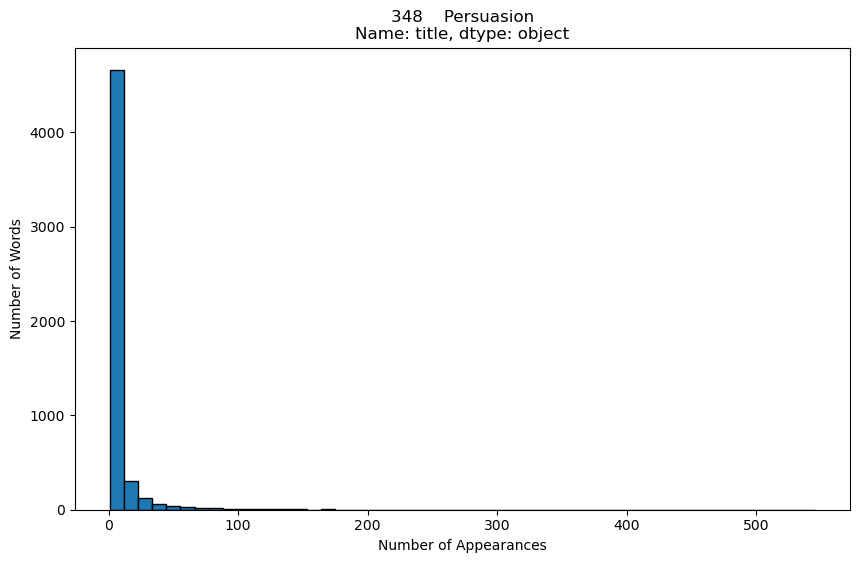

In [63]:
id = 105
counter_object = metadata.loc[metadata['text#'] == id]['word_counter'].reset_index(drop = True)[0]
print(counter_object)
plt.figure(figsize = (10,6))
plt.hist(counter_object.values(), bins = 50, edgecolor = 'black')
plt.xlabel('Number of Appearances')
plt.ylabel('Number of Words')
plt.title(metadata.loc[metadata['text#'] == id]['title']);

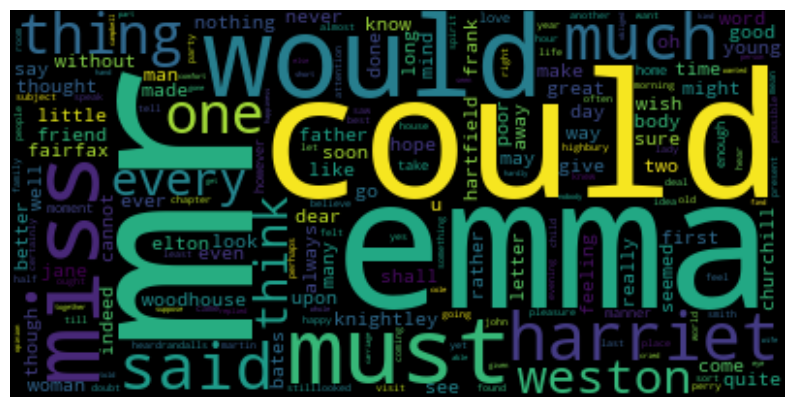

In [67]:
# setting up word cloud with presentation visuals in mind
from wordcloud import WordCloud

wc = WordCloud()

id = 158
counter_object = metadata.loc[metadata['text#'] == id]['word_counter'].reset_index(drop = True)[0]

wc.generate_from_frequencies(counter_object)
plt.figure(figsize = (10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off");